In [1]:
# imported libs for scaling
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

#custom import
import wrangle

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037
...,...,...,...,...,...,...,...
2140230,4,4.0,4375,422400,2015,13877.56,6037
2140231,4,3.0,2262,960756,2015,13494.52,6059
2140232,4,4.5,3127,536061,2014,6244.16,6059
2140233,3,2.5,1974,424353,2015,5302.70,6059


In [4]:
df.fips.value_counts()

6037    1425207
6059     552057
6111     162971
Name: fips, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140235 entries, 0 to 2140234
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    int64  
 1   bathrooms   float64
 2   area        int64  
 3   tax_value   int64  
 4   year_built  int64  
 5   tax_amount  float64
 6   fips        int64  
dtypes: float64(2), int64(5)
memory usage: 114.3 MB


In [6]:
from prepare import train_val_test, visualize_compare, visualize_all_columns, scale_data

In [7]:
train, val, test = train_val_test(df)
train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

In [8]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1001601,3,2.0,1452,241012,1980,2974.81,6037
611989,3,2.0,1262,235630,1953,3029.22,6037
658616,3,1.0,1447,435123,1947,5226.67,6037
835115,3,2.0,1403,268770,1965,2849.62,6111
242295,3,2.0,1456,365000,1961,4582.48,6037


In [9]:
seed = 42

# different scalers
mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()
qt = QuantileTransformer(output_distribution='normal', n_quantiles=10, random_state=seed)    

In [10]:
train_scaled, val_scaled, test_scaled = train_scaled, validate_scaled, test_scaled = scale_data(train, val, test, qt)

In [11]:
train_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1001601,-0.282216,-0.282216,-0.300709,-0.407054,0.847305,2974.81,6037
611989,-0.282216,-0.282216,-0.675047,-0.432552,-0.355490,3029.22,6037
658616,-0.282216,-1.220640,-0.309551,0.363889,-0.793734,5226.67,6037
835115,-0.282216,-0.282216,-0.388504,-0.279443,0.302980,2849.62,6111
242295,-0.282216,-0.282216,-0.293652,0.123869,0.139710,4582.48,6037


In [12]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1001601,3,2.0,1452,241012,1980,2974.81,6037
611989,3,2.0,1262,235630,1953,3029.22,6037
658616,3,1.0,1447,435123,1947,5226.67,6037
835115,3,2.0,1403,268770,1965,2849.62,6111
242295,3,2.0,1456,365000,1961,4582.48,6037


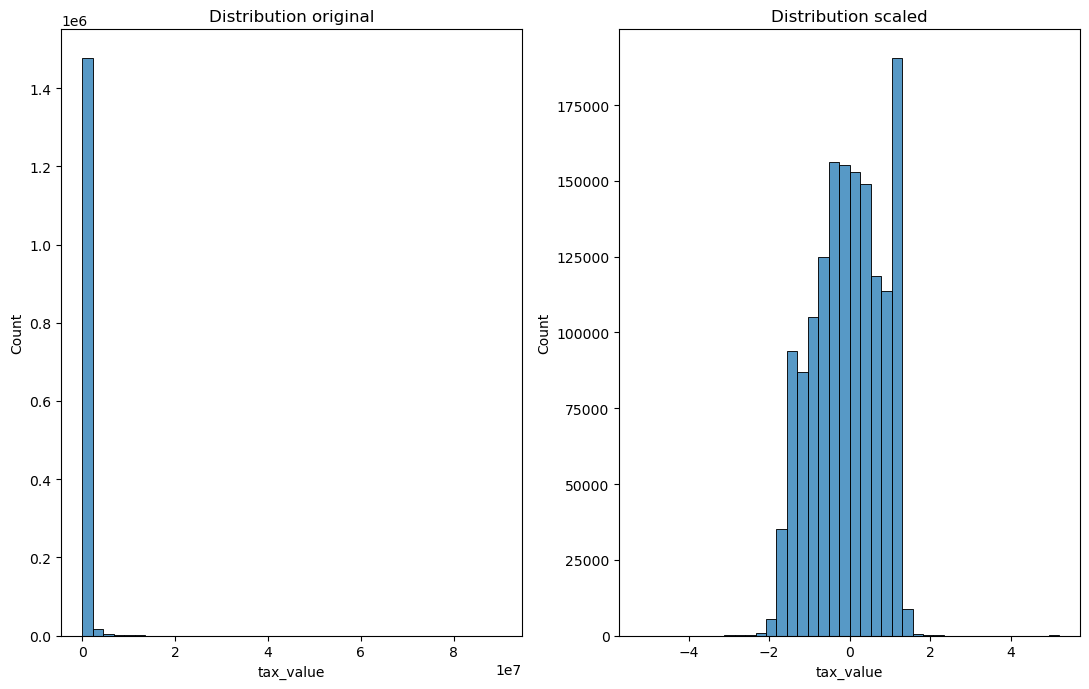

In [13]:
# Compare distributions for each scaled column
visualize_compare(train_scaled['tax_value'], train, 'tax_value')

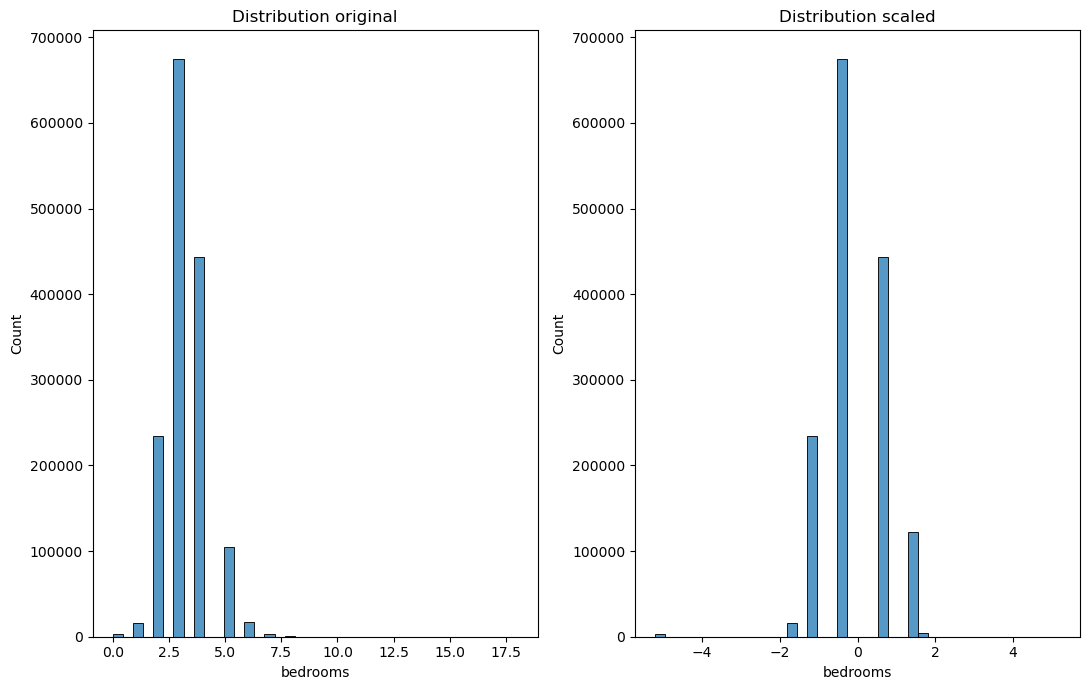

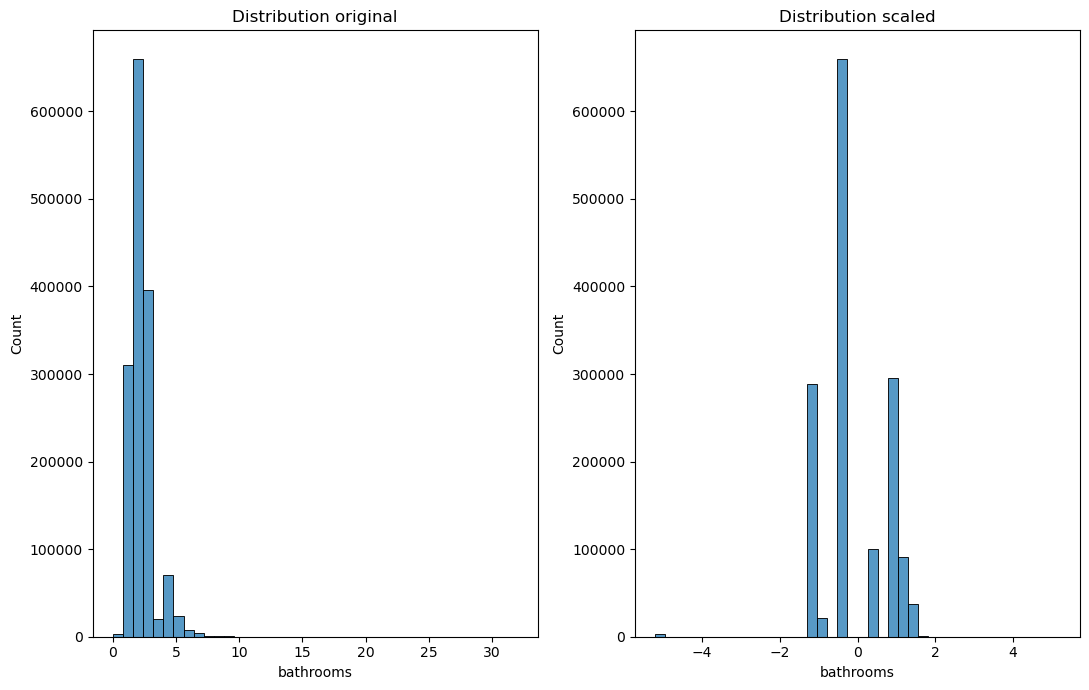

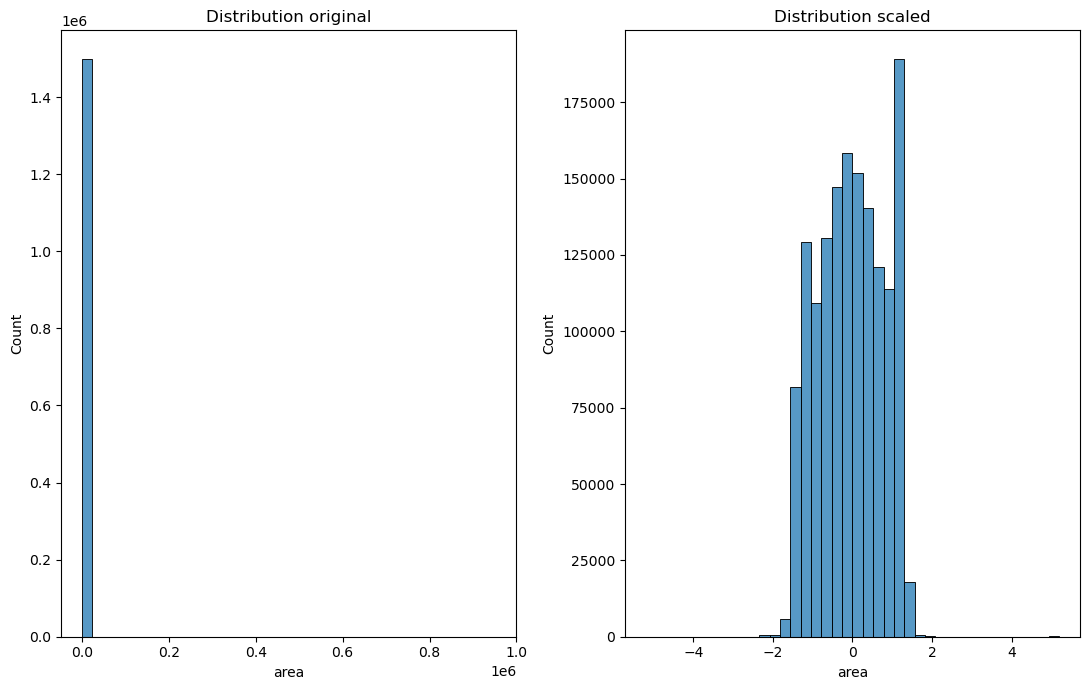

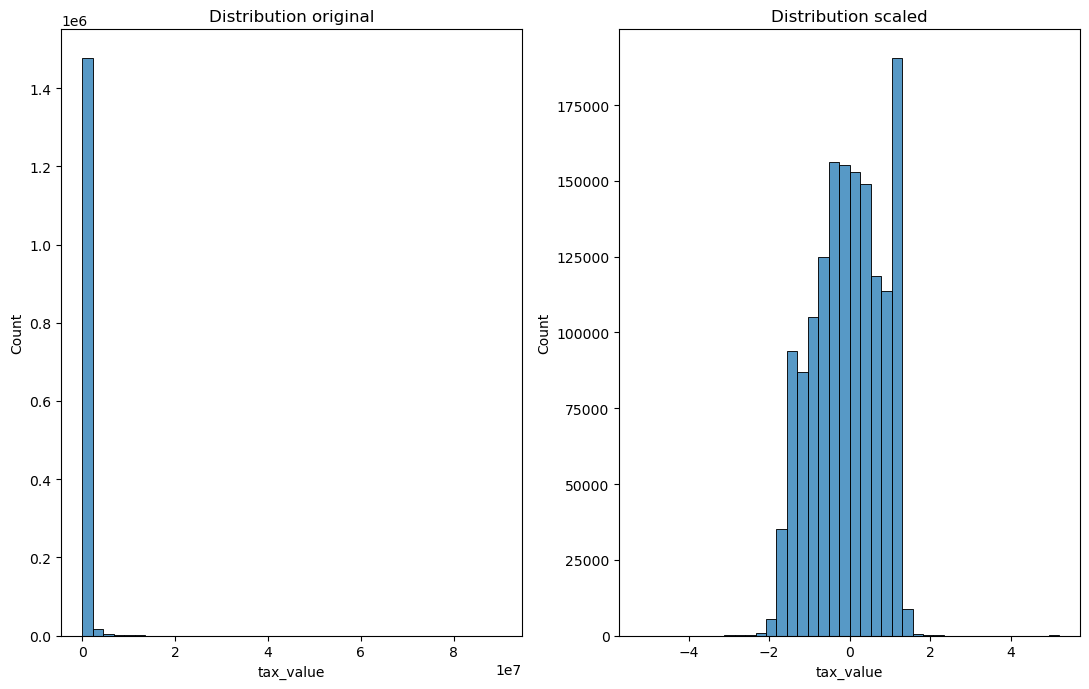

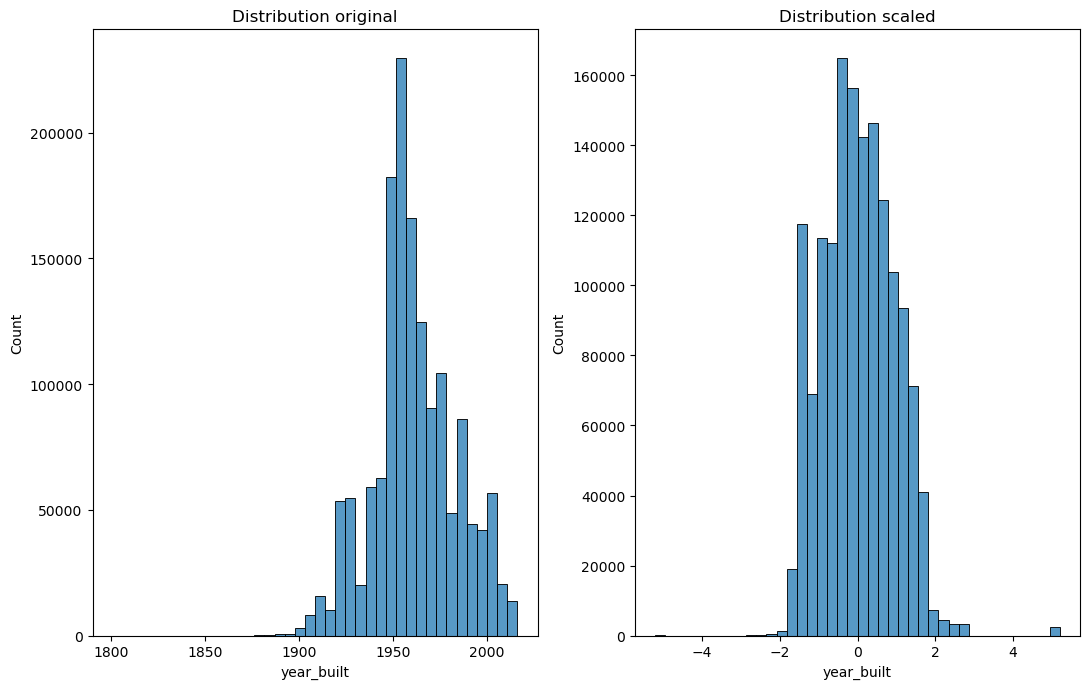

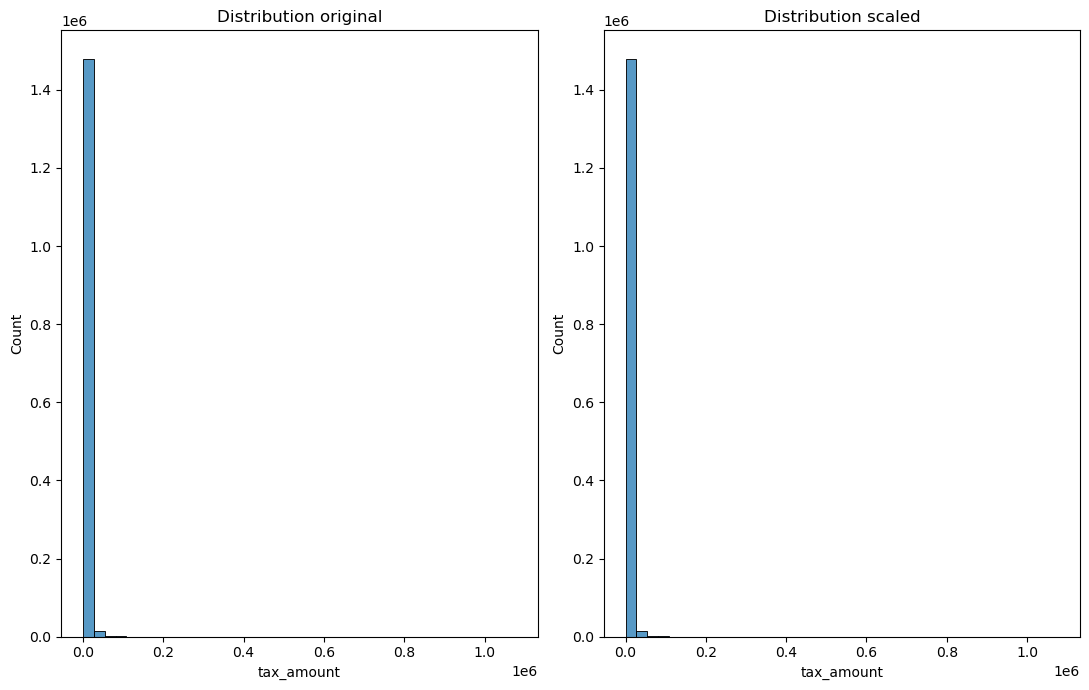

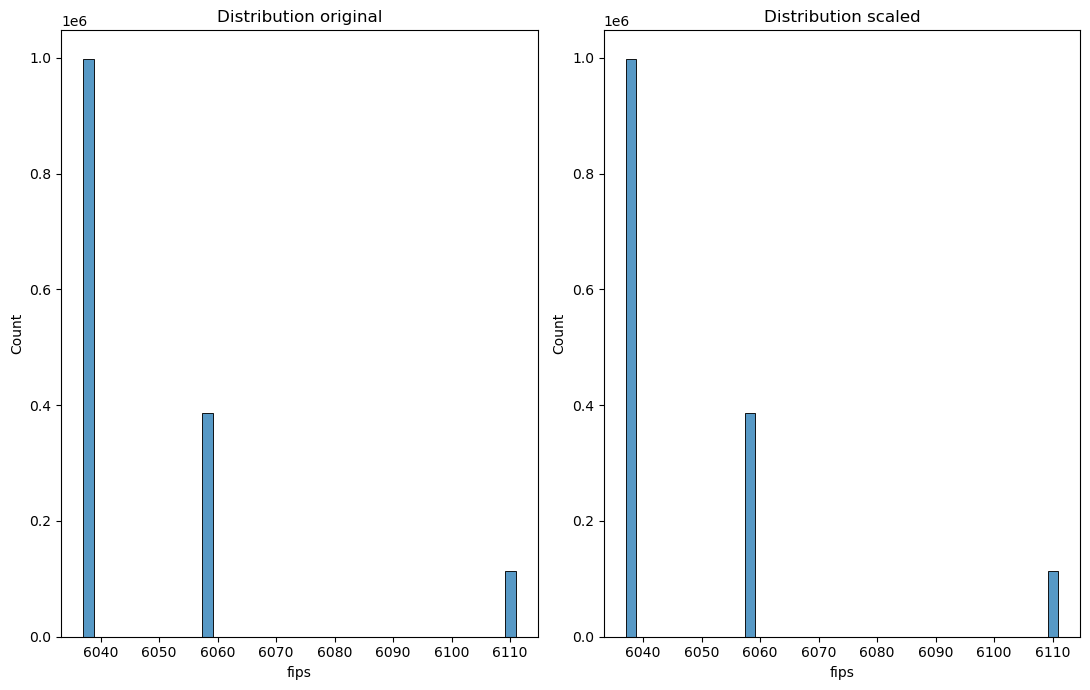

In [14]:
visualize_all_columns(train_scaled, train)

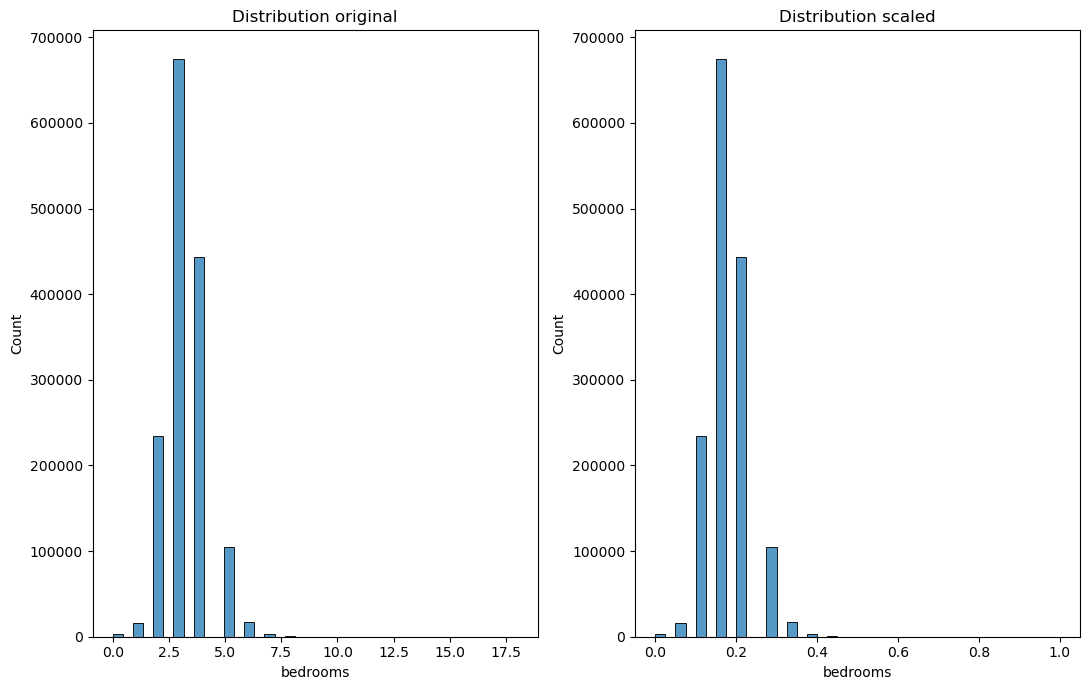

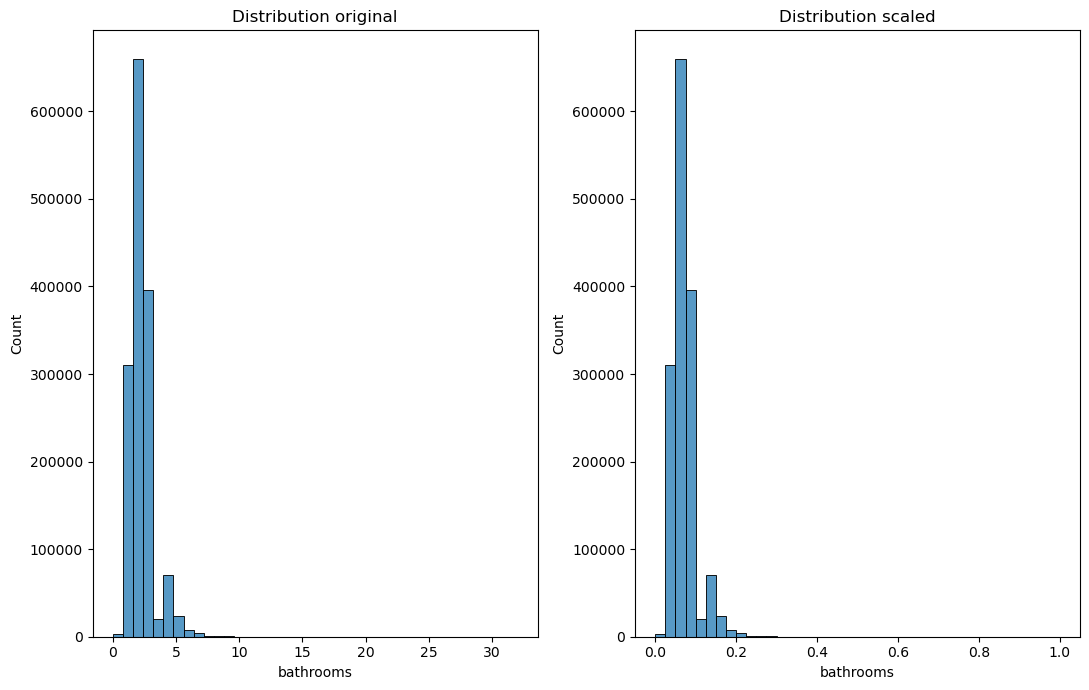

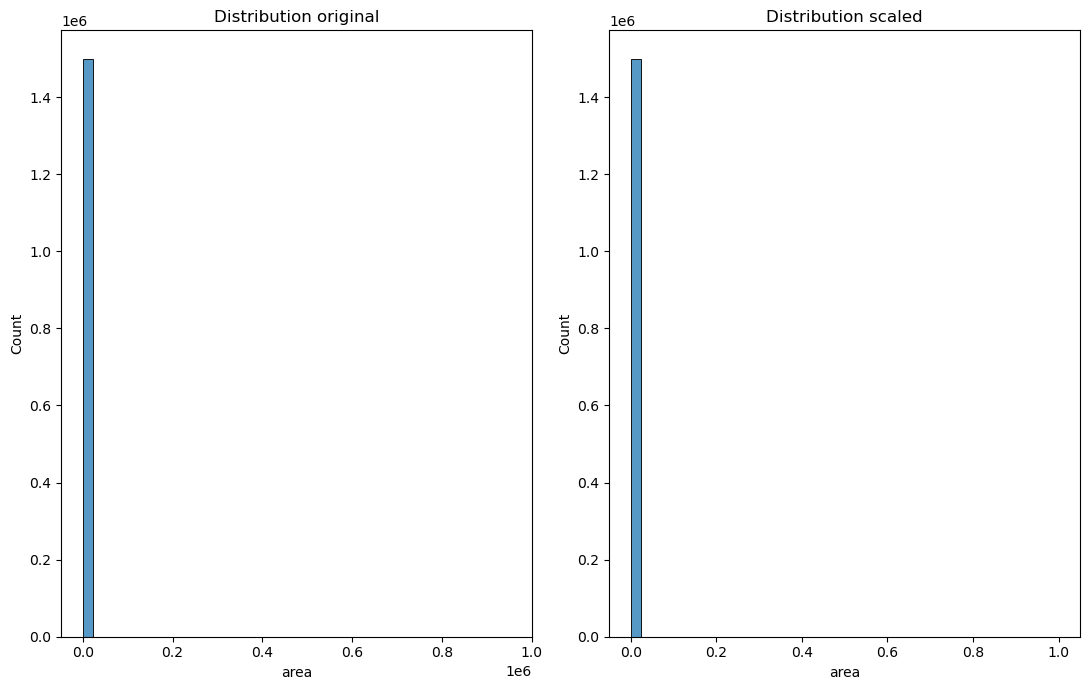

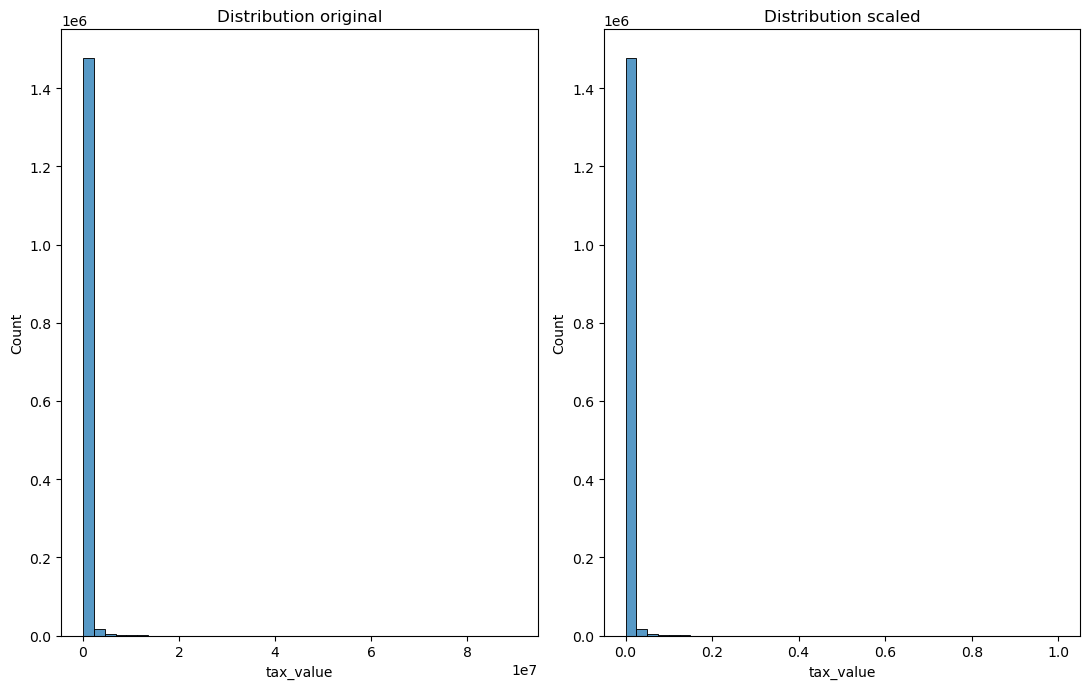

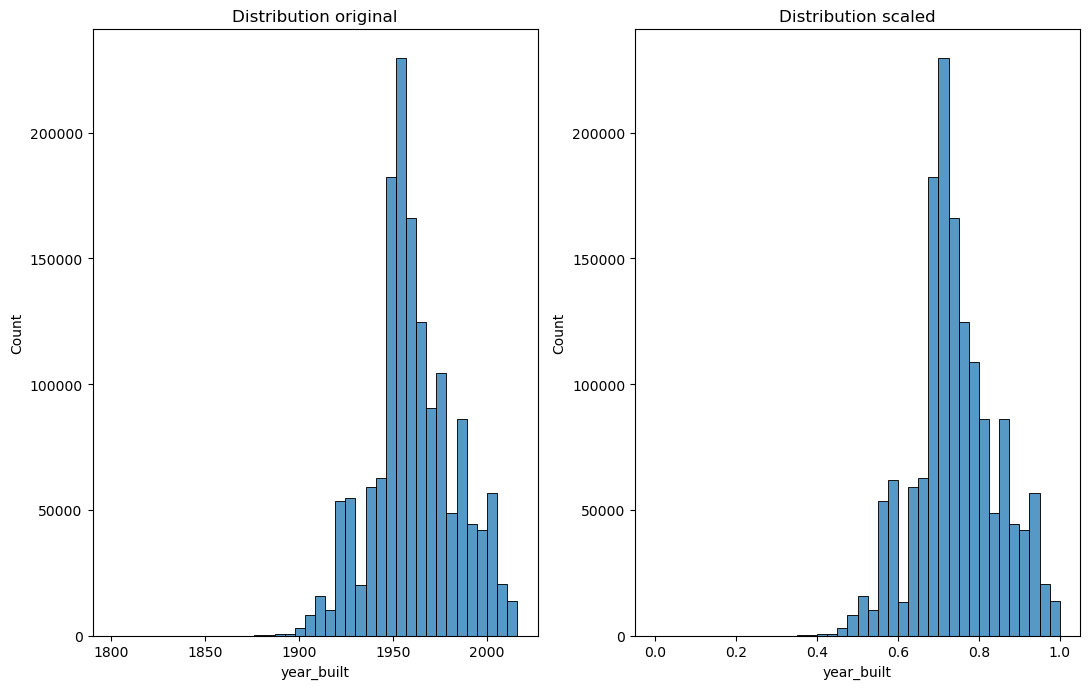

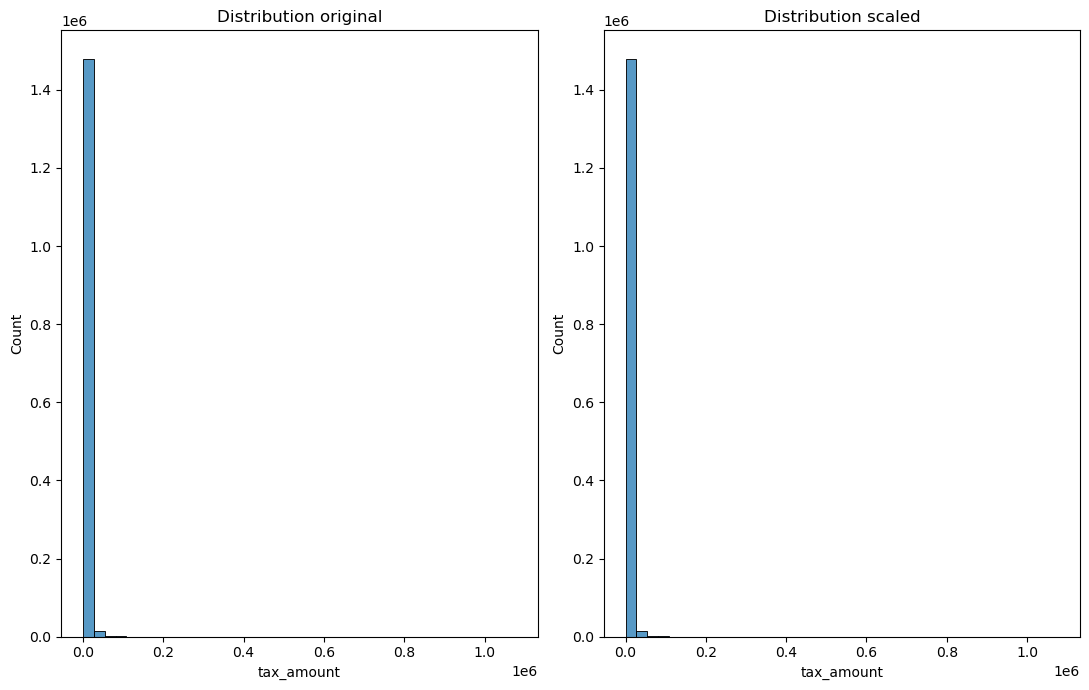

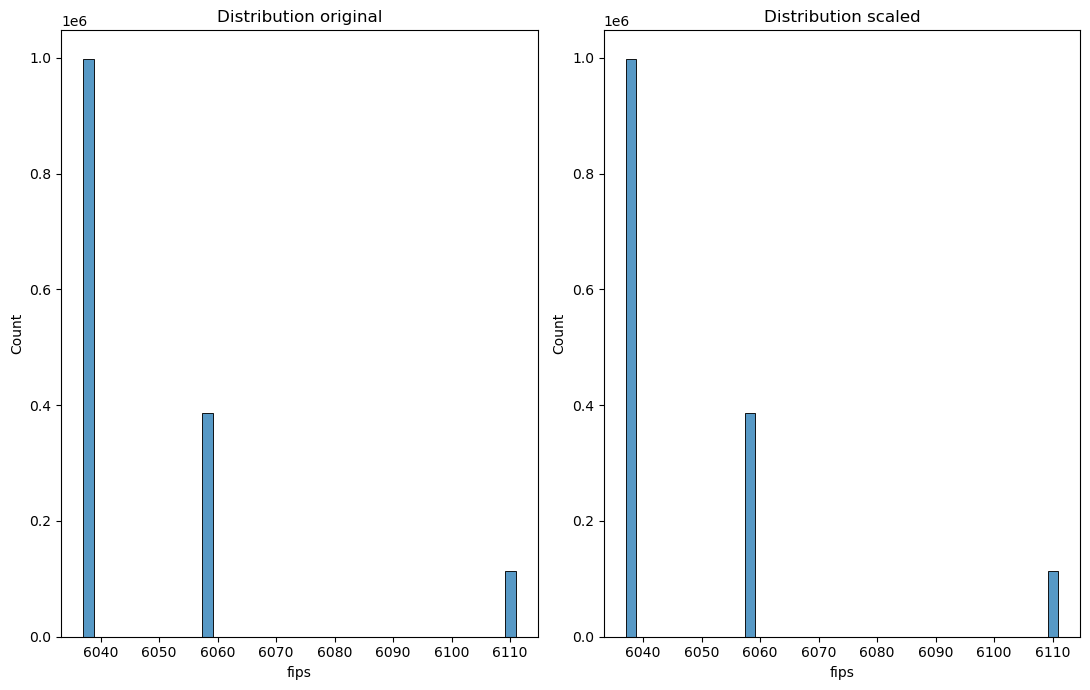

In [15]:
# Scale the data
train_scaled, validate_scaled, test_scaled = scale_data(train, val, test, mms)

# Visualize all of the columns
visualize_all_columns(train_scaled, train)

In [16]:
# for col in df.columns:
#     visualize_compare(train_scaled[col], train, col)